## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

#### Import the CSV Data as Pandas DataFrame

In [34]:
data=pd.read_csv('data\\stud.csv')


#### Show Top 5 Records

In [35]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
#shape of dataset
data.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [37]:
#Chack Missing values
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the data set**

In [38]:
#Check Duplicates
data.duplicated().sum()

np.int64(0)

**There are no duplicates  values in the data set**

In [39]:
#Check DataType
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [40]:
# Checking the number of unique values of each column
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [41]:
# Check statistics of data set
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [42]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())
print('\n')
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(data['race_ethnicity'].unique())
print('\n')
print("Categories in'parental level of education' variable:",end=" " )
print(data['parental_level_of_education'].unique())
print('\n')
print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())
print('\n')
print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']


Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']


Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categories in 'lunch' variable:      ['standard' 'free/reduced']


Categories in 'test preparation course' variable:      ['none' 'completed']


In [44]:
len(data.columns)

8

In [45]:
# define numerical & categorical columns
numeric_features=[features for features in data.columns if data[features].dtype != 'O']
# numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Numaric Features are :',numeric_features)
print('---'*20)
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('categorical features are : ',categorical_features)

Numaric Features are : ['math_score', 'reading_score', 'writing_score']
------------------------------------------------------------
categorical features are :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [46]:
data.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


### 3.8 Adding columns for "Total Score" and "Average"

In [51]:
data['Total_Score']=data['math_score']+data['math_score']+data['math_score']
data['Avg_Score']=data['Total_Score']/3


In [54]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_Score', 'Avg_Score'],
      dtype='object')

In [81]:
reading_full = data[data['reading_score'] == 100]['Avg_Score'].count()
writing_full = data[data['writing_score'] == 100]['Avg_Score'].count()
math_full = data[data['math_score'] == 100]['Avg_Score'].count()

print('Number of students with full marks in Maths: ',math_full)
print('Number of students with full marks in Writing: ',writing_full)
print('Number of students with full marks in Reading: ',reading_full)

Number of students with full marks in Maths:  7
Number of students with full marks in Writing:  14
Number of students with full marks in Reading:  17


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

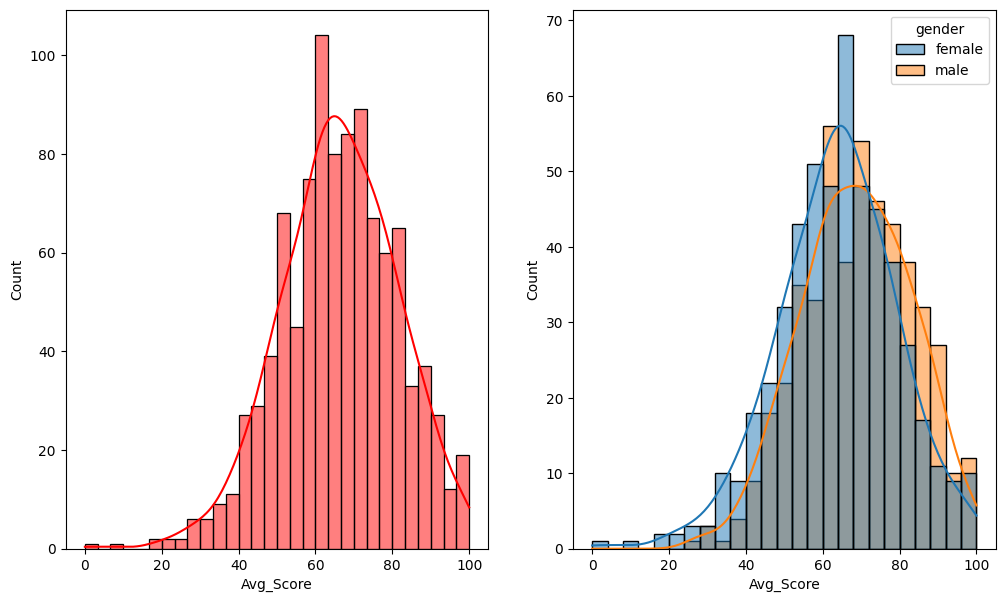

In [95]:
fig, axs = plt.subplots(1,2, figsize=(12, 7))
plt.subplot(121)
sns.histplot(data=data,x='Avg_Score',bins=30,color='r',kde=True)
plt.subplot(122)
sns.histplot(data=data,x='Avg_Score',hue='gender',color='g',kde=True)
plt.show()

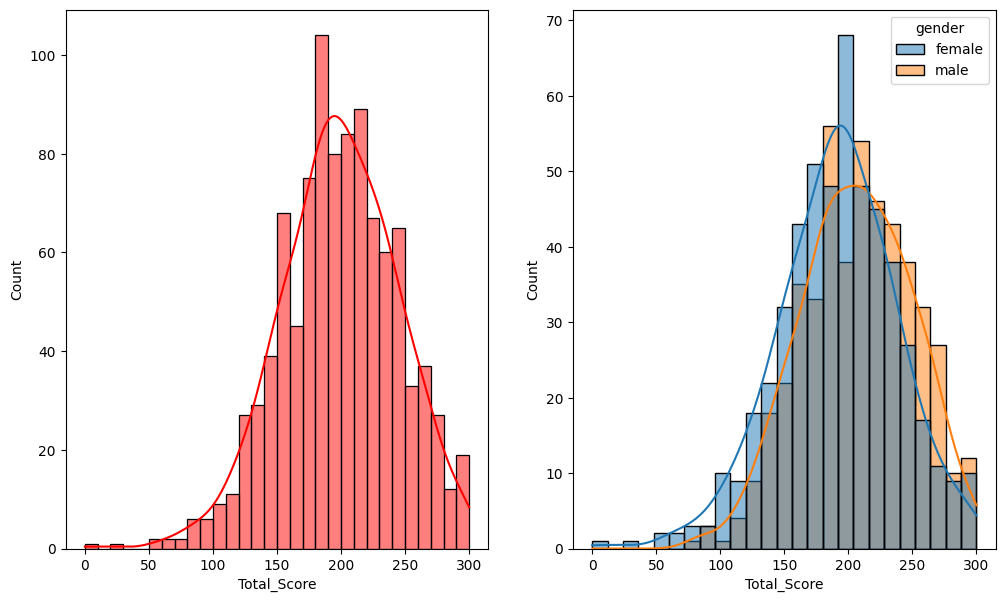

In [96]:
fig, axs = plt.subplots(1,2, figsize=(12, 7))
plt.subplot(121)
sns.histplot(data=data,x='Total_Score',bins=30,color='r',kde=True)
plt.subplot(122)
sns.histplot(data=data,x='Total_Score',hue='gender',color='g',kde=True)
plt.show()

#####  Insights
- Female students tend to perform well then male students.

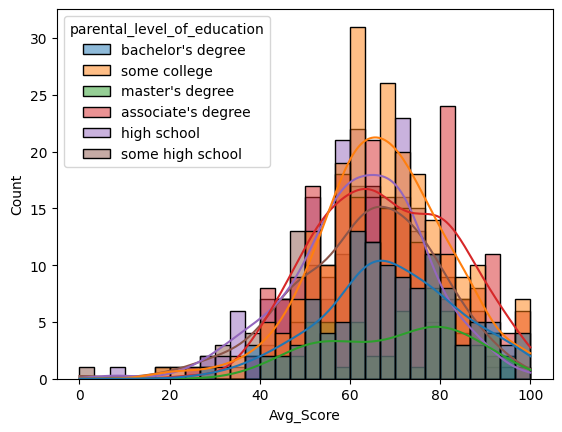

In [117]:

sns.histplot(data=data,x='Avg_Score',hue='parental_level_of_education',kde=True,bins=30,color='g')
plt.show()

In [112]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Avg_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.0
1,female,group C,some college,standard,completed,69,90,88,207,69.0
2,female,group B,master's degree,standard,none,90,95,93,270,90.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,141,47.0
4,male,group C,some college,standard,none,76,78,75,228,76.0


In [97]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_Score', 'Avg_Score'],
      dtype='object')